In [52]:
#To understand below codes, you can check this url
#https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dnizcn","key":"e79b32a6644983caebf00aae04d899de"}'}

In [53]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
import kaggle

In [54]:
!kaggle datasets list -s "used-car-dataset-ford-and-mercedes" # I searched these words

ref                                                 title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kukuroo3/used-car-price-dataset-competition-format   used car price dataset (competition format)  136KB  2022-01-30 06:47:40           3104        103  0.7058824        
adityadesai13/used-car-dataset-ford-and-mercedes    100,000 UK Used Car Data set                    1MB  2020-07-04 11:30:07          31182        721  1.0              
vishwajeetrv/used-cars                              Used Cars                                      88KB  2023-02-06 17:18:25             12          1  0.4117647        


In [55]:
# Select a dataset by its ref attribute
selected_dataset_ref = "adityadesai13/used-car-dataset-ford-and-mercedes"  # Replace with the ref of the dataset you want to download
kaggle.api.dataset_download_files(dataset=selected_dataset_ref, path=".", unzip=True) # path="." means current file

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow


In [57]:
df = pd.read_csv("merc.csv")
df.head()

In [101]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [60]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<ipython-input-61-058d1ad30769>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

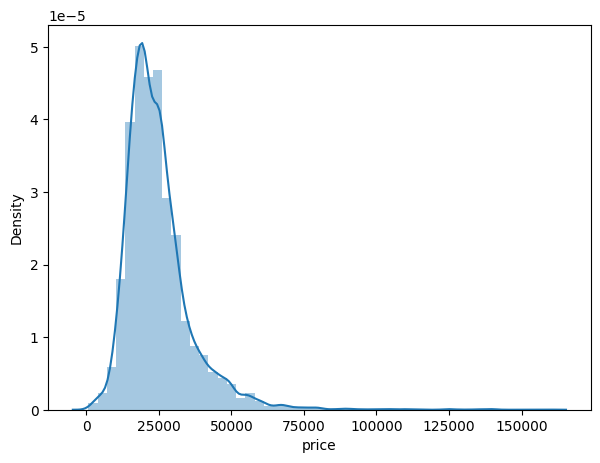

In [61]:
plt.figure(figsize=(7,5))
sbn.distplot(df["price"])

<Axes: xlabel='year', ylabel='count'>

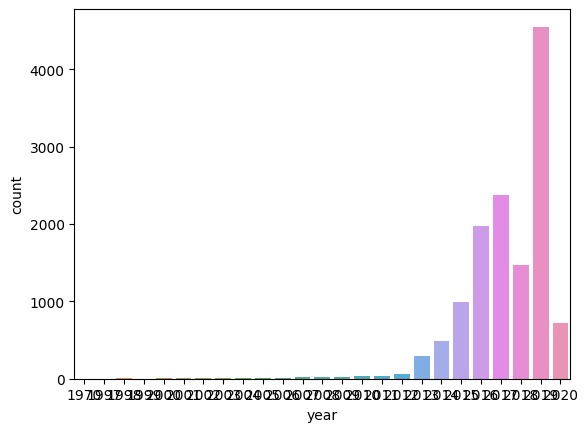

In [65]:
sbn.countplot(data=df, x="year")

In [66]:
df.corr()

<ipython-input-66-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


<Axes: xlabel='mileage', ylabel='price'>

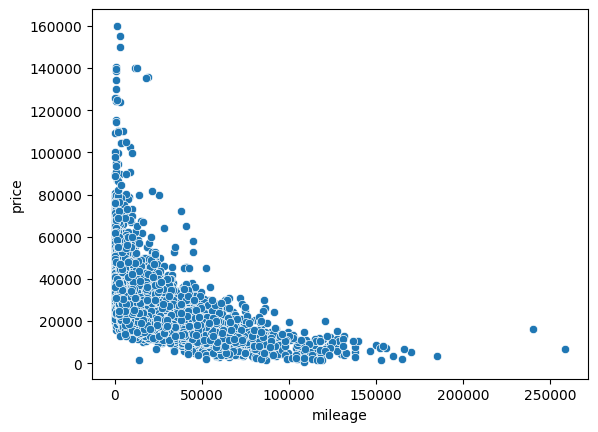

In [102]:
sbn.scatterplot(x="mileage",y="price",data=df)

In [ ]:
int(len(df)*0.01)

131

In [125]:
df99=df.sort_values("price",ascending = False).iloc[int(len(df)*0.01):]

In [127]:
df99 = df99[df99.year != 1970]

In [ ]:
df99.describe()

In [129]:
df99 = df99.drop(["transmission","model","fuelType"],axis=1)

In [130]:
y = df99["price"].values
x = df99.drop("price",axis=1).values

In [115]:
from sklearn.model_selection import train_test_split

In [131]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=10)

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

In [135]:
x_train = scaler.fit_transform(x_train)

In [136]:
x_test = scaler.transform(x_test)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [138]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

In [140]:
kv=pd.DataFrame(model.history.history)

<Axes: >

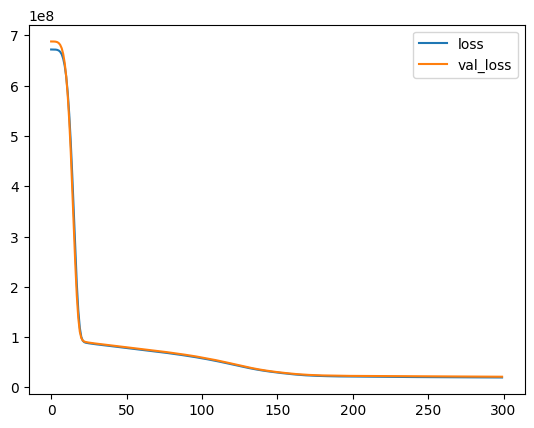

In [154]:
kv.plot()

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
td=model.predict(x_test)

122/122 [==============================] - 0s 1ms/step


In [152]:
mean_absolute_error(y_test,td)

3241.738601226454

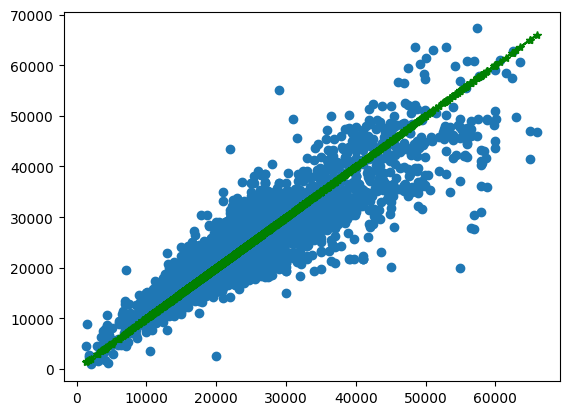

In [153]:
plt.scatter(y_test,td)
plt.plot(y_test,y_test,"g-*")

In [155]:
yeniArabaSeries = df99.drop("price",axis=1).iloc[3]#what ever which index you want


In [156]:
yeniArabaSeries

year          2019.0
mileage       3398.0
tax            145.0
mpg             27.2
engineSize       4.0
Name: 4727, dtype: float64

In [157]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))


In [158]:
model.predict(yeniArabaSeries)


1/1 [==============================] - 0s 22ms/step


array([[59490.82]], dtype=float32)